In [178]:
from silo_to_yt import *
import sys
import pickle
yt.set_log_level("ERROR")
import matplotlib.pyplot as plt

In [179]:
data_path = '/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/red_z_res/wr140-mhd-l7n256/'
evolution = make_snapshots(data_path)
ds = get_ds(evolution[230], quantities=["magnetic_field", "pressure", "NG_Mask"])
ds.field_list 

Info from silo files:
Basename of silo files: wr140_mhd_cool_d3l7n256
Simulation Info: 7 levels
Number of snapshots: 285


[('gas', 'NG_Mask'),
 ('gas', 'magnetic_field_x'),
 ('gas', 'magnetic_field_y'),
 ('gas', 'magnetic_field_z'),
 ('gas', 'pressure')]

In [181]:
def _Isync(field, data):
    Isync = data["magnetic_field_magnitude"]**(3/2) * data["pressure"] * data["NG_Mask"]
    return Isync

ds.add_field(("gas", "Isync"), function=_Isync, units="auto", sampling_type="cell", force_override=True)



In [209]:
from yt.units import dimensions

def plotting_function(data, normal, **kwargs):
    
    def _Isync_perp(field, data):
        Bx = data["magnetic_field_x"]
        By = data["magnetic_field_y"]
        Bz = data["magnetic_field_z"]
        Bmag = data['magnetic_field_magnitude']

        nz, ny, nx = normal
        nmag = np.sqrt(nx**2 + ny**2 + nz**2)
        nhat = (nx/nmag, ny/nmag, nz/nmag)
        nx_array = np.array(nhat[0]*np.ones(Bx.shape))
        ny_array = np.array(nhat[1]*np.ones(By.shape))
        nz_array = np.array(nhat[2]*np.ones(Bz.shape))
  
        fraction = (nx_array*Bx + ny_array*By + nz_array*Bz)/(Bmag)
        theta = np.arccos(fraction)

        Bperp = Bmag * np.sin(theta)
        Isync = ((Bperp)**(3/2) * data["pressure"] * data["NG_Mask"])
        # Isync.units = "W/cm**2"
        return Isync

    ds.add_field(("gas", "Isync_perp"), function=_Isync_perp, units="auto", sampling_type="cell" , force_override=True)

    # print(len(data))
    

plotting_function(ds, normal=[0,-1,0])


In [210]:
print(ds.all_data()["Isync_perp"].shape)
print(ds.all_data()["magnetic_field_magnitude"].shape)

(26214400,)
(26214400,)


In [222]:
plotting_function(ds, normal=[-1,0,0])
p1 = yt.ProjectionPlot(ds, "z", ("gas", "Isync_perp"))
p2 = yt.ProjectionPlot(ds, "z", ("gas", "Isync"))

plotting_function(ds, normal=[0,-1,0])
p3 = yt.ProjectionPlot(ds, "y", ("gas", "Isync_perp"))
p4 = yt.ProjectionPlot(ds, "y", ("gas", "Isync"))

plotting_function(ds, normal=[0,0,-1])
p5 = yt.ProjectionPlot(ds, "x", ("gas", "Isync_perp"))
p6 = yt.ProjectionPlot(ds, "x", ("gas", "Isync"))


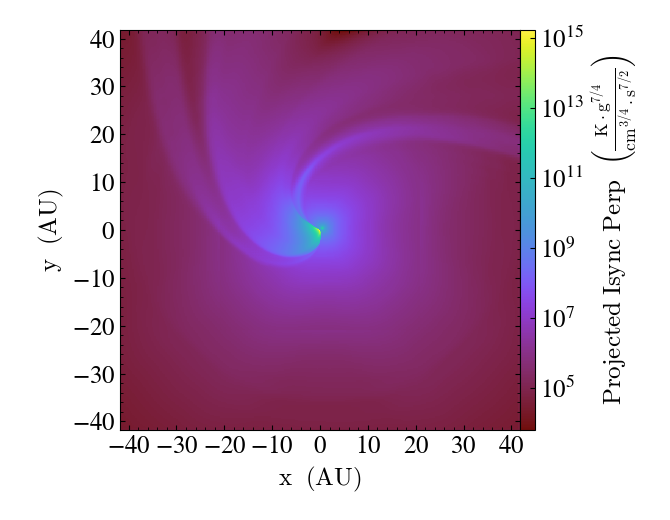


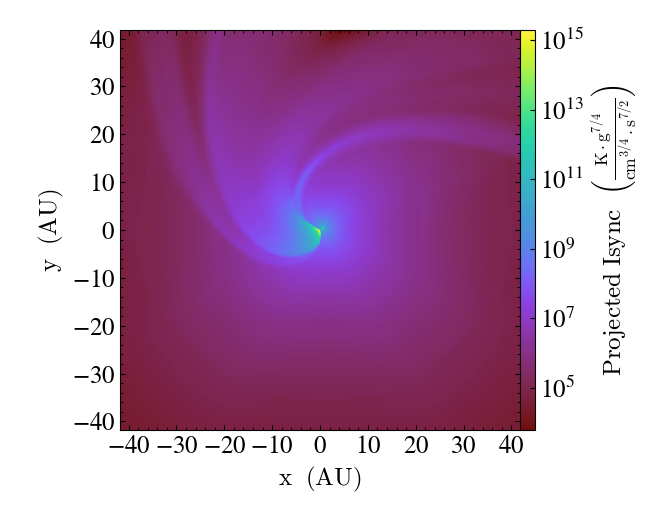

In [223]:
p1.set_figure_size(4)
p1.show()
p2.set_figure_size(4)
p2.show()


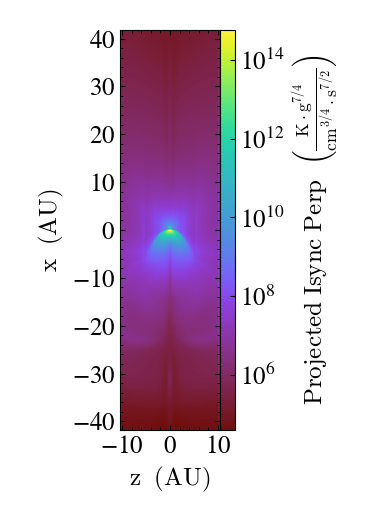


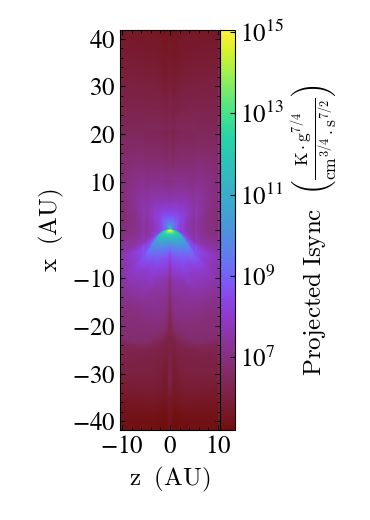

In [224]:
p3.set_figure_size(4)
p3.show()
p4.set_figure_size(4)
p4.show()


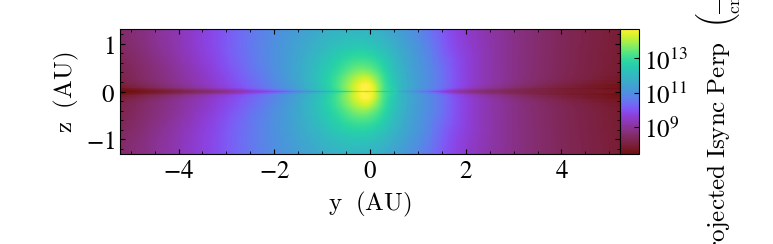


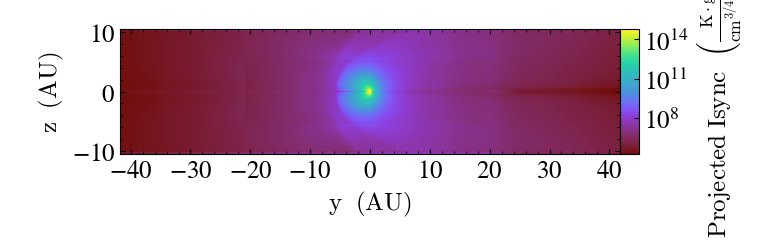

In [227]:
p5.set_figure_size(5)
p5.zoom(8)
p5.show()
p6.set_figure_size(5)
p5.zoom(8)
p6.show()

In [226]:
# from mpl_toolkits.axes_grid1 import AxesGrid

# fig = plt.figure()

# grid = AxesGrid(
#     fig,
#     (0.075, 0.075, 0.85, 0.85),
#     nrows_ncols=(2, 2),
#     axes_pad=1.0,
#     label_mode="1",
#     share_all=True,
#     cbar_location="right",
#     cbar_mode="each",
#     cbar_size="3%",
#     cbar_pad="0%",
# )

# fig1
